# Part II: Exploratory Data Analysis (EDA)

## Basic settings

In [1]:
import os
os.environ["PYTHONUTF8"] = "1"

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
import warnings
from datetime import datetime, timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 50
pd.options.display.max_columns = None

In [5]:
DATA_DIR = "../data"
FIGURES_DIR = "../figures_new"

## Load preprocessed data

In [6]:
df_sales = pd.read_csv(
    os.path.join(DATA_DIR, "sales_data_preprocessed.csv"), parse_dates=["date"]
)
df_weather = pd.read_csv(
    os.path.join(DATA_DIR, "weather_preprocessed.csv"), parse_dates=["date"]
)

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201025 entries, 0 to 201024
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        201025 non-null  datetime64[ns]
 1   province    201025 non-null  object        
 2   store_id    201025 non-null  int64         
 3   store_name  201025 non-null  object        
 4   category    201025 non-null  object        
 5   item_id     201025 non-null  int64         
 6   item_name   201025 non-null  object        
 7   sales       201025 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 12.3+ MB


In [9]:
df_sales.head()

,date,province,store_id,store_name,category,item_id,item_name,sales
0,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,1,Rice,8.0
1,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,2,Noodles,11.0
2,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,3,Bread,24.0
3,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,4,Flour,6.0
4,2016-01-01,Hanoi,1,Hoan Kiem Market,Staples,5,Cooking Oil,11.0


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   province     1462 non-null   object        
 1   date         1462 non-null   datetime64[ns]
 2   temperature  1462 non-null   float64       
 3   humidity     1462 non-null   float64       
 4   season       1462 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 57.2+ KB


In [11]:
df_weather.head(20)

,province,date,temperature,humidity,season
0,Hanoi,2016-01-01,13.4,87.8,winter
1,Ho Chi Minh City,2016-01-01,27.7,69.1,dry
2,Hanoi,2016-01-02,15.2,75.2,winter
3,Ho Chi Minh City,2016-01-02,26.6,69.9,dry
4,Hanoi,2016-01-03,19.2,86.0,winter
5,Ho Chi Minh City,2016-01-03,25.8,74.8,dry
6,Hanoi,2016-01-04,12.8,85.4,winter
7,Ho Chi Minh City,2016-01-04,24.0,66.7,dry
8,Hanoi,2016-01-05,16.8,88.3,winter
9,Ho Chi Minh City,2016-01-05,25.2,66.0,dry


## Perform EDA

In [12]:
print("BASIC STATISTICAL SUMMARY:")

# Basic statistical summary
print("\ndf_sales Summary Statistics:")
print(df_sales["sales"].describe())

print("\ndf_weather Summary Statistics:")
print(df_weather[["temperature", "humidity"]].describe())

# Check the time range of the data
print(
    f"\ndf_sales data date range: {df_sales['date'].min()} to {df_sales['date'].max()}"
)
print(
    f"df_weather data date range: {df_weather['date'].min()} to {df_weather['date'].max()}"
)

# Count unique values
print(f"\nNumber of unique stores: {df_sales['store_id'].nunique()}")
print(f"Number of unique items: {df_sales['item_id'].nunique()}")
print(f"Categories: {df_sales['category'].unique()}")
print(f"Provinces: {df_sales['province'].unique()}")
print(f"Seasons: {df_weather['season'].unique()}")

BASIC STATISTICAL SUMMARY:

df_sales Summary Statistics:
count    201025.000000
mean         27.112890
std          19.555403
min           1.000000
25%          13.000000
50%          22.000000
75%          34.000000
max         107.000000
Name: sales, dtype: float64

df_weather Summary Statistics:
       temperature     humidity
count  1462.000000  1462.000000
mean     25.709439    80.166826
std       4.407278     7.476195
min      12.700000    62.100000
25%      24.300000    75.125000
50%      27.000000    80.400000
75%      28.500000    86.300000
max      33.500000    95.000000

df_sales data date range: 2016-01-01 00:00:00 to 2017-12-31 00:00:00
df_weather data date range: 2016-01-01 00:00:00 to 2017-12-31 00:00:00

Number of unique stores: 10
Number of unique items: 35
Categories: ['Staples' 'Dairy & Frozen' 'Beverages & Snacks'
 'Household & Personal Care' 'Baby & Health']
Provinces: ['Hanoi' 'Ho Chi Minh City']
Seasons: ['winter' 'dry' 'spring' 'summer' 'wet' 'fall']


In [13]:
save_figrure = True

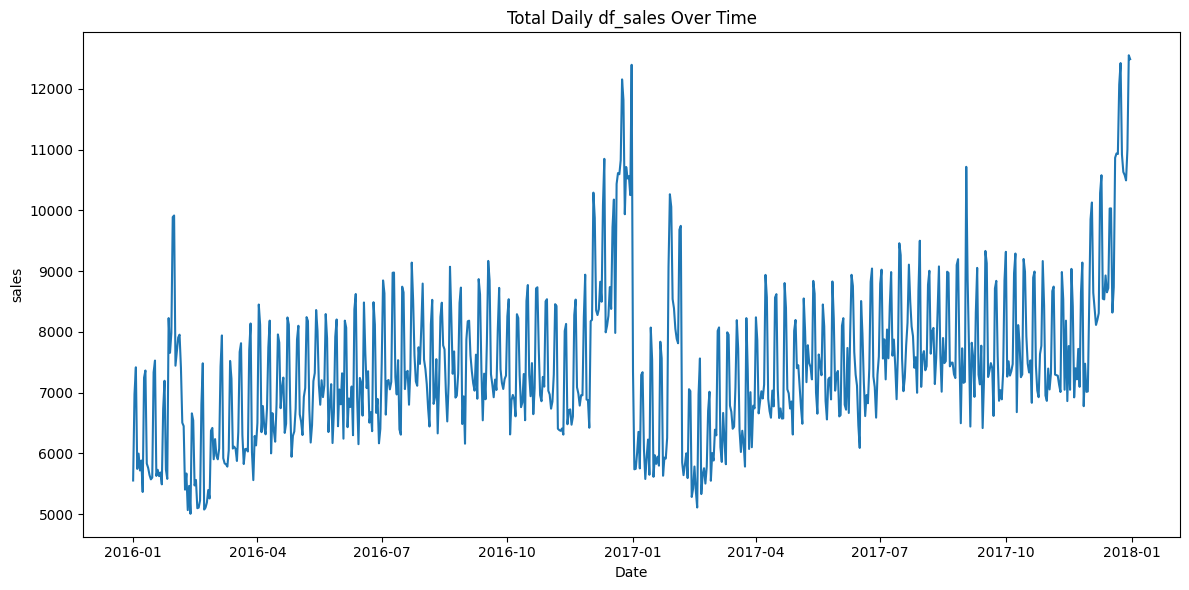

In [14]:
# df_sales trends over time
plt.figure(figsize=(12, 6))
daily_df_sales = df_sales.groupby("date")["sales"].sum().reset_index()
plt.plot(daily_df_sales["date"], daily_df_sales["sales"])
plt.title("Total Daily df_sales Over Time")
plt.xlabel("Date")
plt.ylabel("sales")
plt.tight_layout()

if save_figrure:
    plt.savefig(os.path.join(FIGURES_DIR, "daily_df_sales_trend.png"))

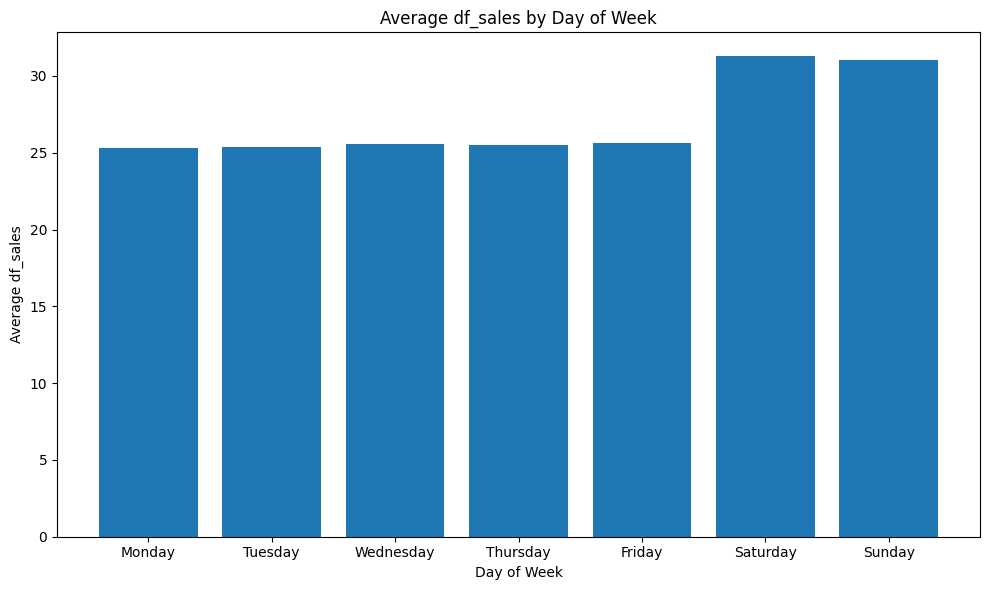

In [15]:
# df_sales by day of week
plt.figure(figsize=(10, 6))
df_sales["day_of_week"] = df_sales["date"].dt.dayofweek
day_names = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
df_sales_by_day = df_sales.groupby("day_of_week")["sales"].mean().reindex(range(7))
plt.bar(day_names, df_sales_by_day)
plt.title("Average df_sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average df_sales")
plt.tight_layout()

if save_figrure:
    plt.savefig(os.path.join(FIGURES_DIR, "df_sales_by_day.png"))

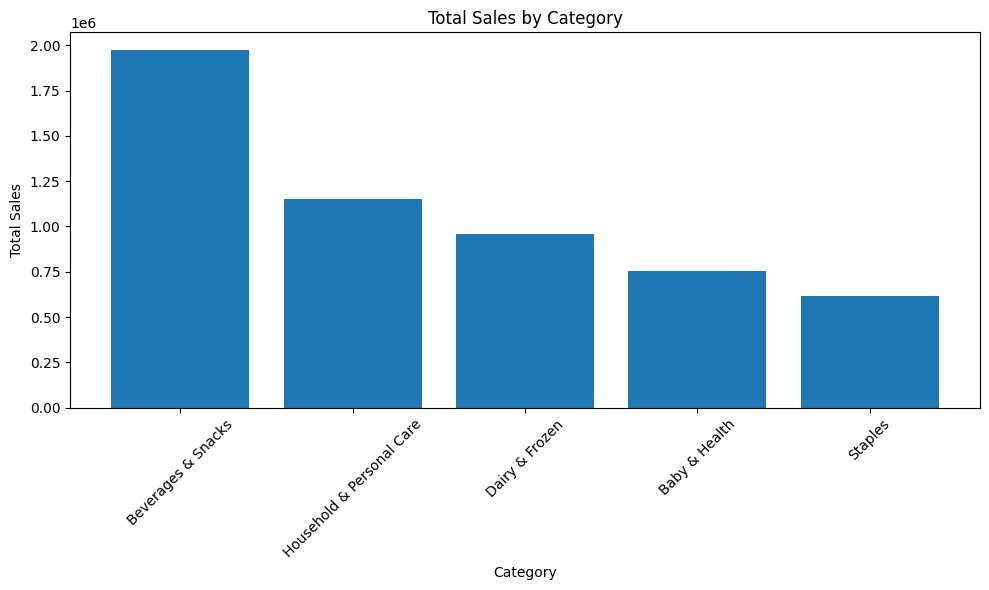

In [17]:
# Sales by category
plt.figure(figsize=(10, 6))
category_sales = (
    df_sales.groupby("category")["sales"].sum().sort_values(ascending=False)
)
plt.bar(category_sales.index, category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

if save_figrure:
    plt.savefig(os.path.join(FIGURES_DIR, "sales_by_category.png"))

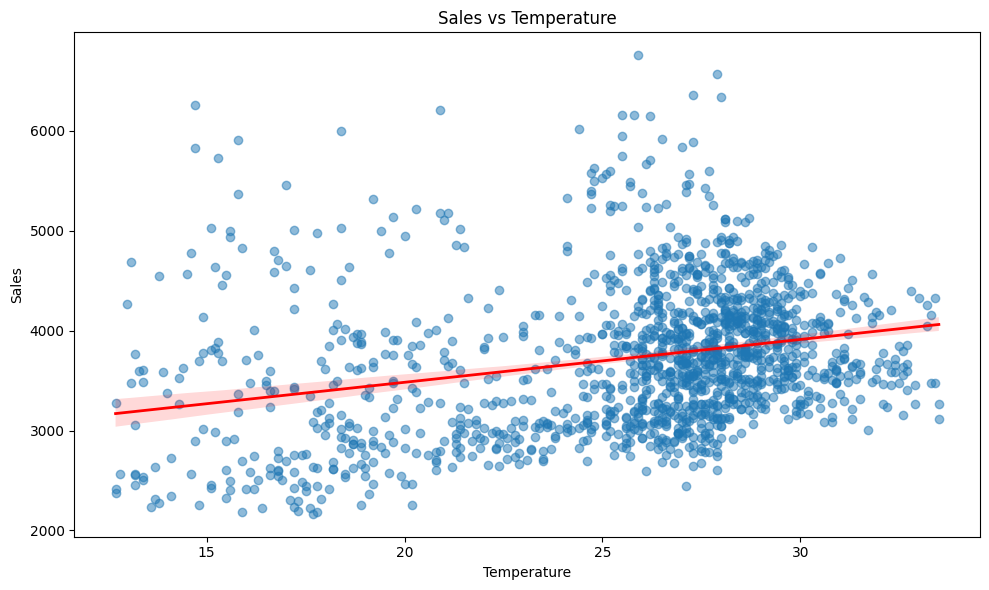

In [16]:
# Correlation between temperature and sales
plt.figure(figsize=(10, 6))

# Create a sample by merging a subset of sales and weather
sample = pd.merge(
    df_sales[["date", "province", "sales"]]
    .groupby(["date", "province"])
    .sum()
    .reset_index(),
    df_weather[["date", "province", "temperature"]],
    on=["date", "province"],
)

# Scatter plot with regression (trend) line
sns.regplot(
    data=sample,
    x="temperature",
    y="sales",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red", "linewidth": 2},
)

plt.title("Sales vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.tight_layout()

if save_figrure:
    plt.savefig(os.path.join(FIGURES_DIR, "sales_vs_temperature.png"))